<h2> Analyze, compare and generate visualizations for the Rouge-N score of summaries</h2>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
d = pd.read_csv("results.csv")

In [15]:
headers = list(d)
print headers

['article No. ', ' Words ', ' sentences ', ' Luhn Rouge1 ', ' Luhn Rouge2 ', ' TextRank-Word_count Rouge1 ', ' TextRank-Word_count Rouge2 ', ' TextRank-word2vec Rouge1 ', ' TextRank-word2vec Rouge2']


In [16]:
xtags = d[headers[0]]
Luhn_rouge1 = d[headers[4]]
TextRank_wc_rouge1 = d[headers[6]]
TextRank_w2v_rouge1 = d[headers[8]]

Text(0,0.5,u'Rouge2 Score')

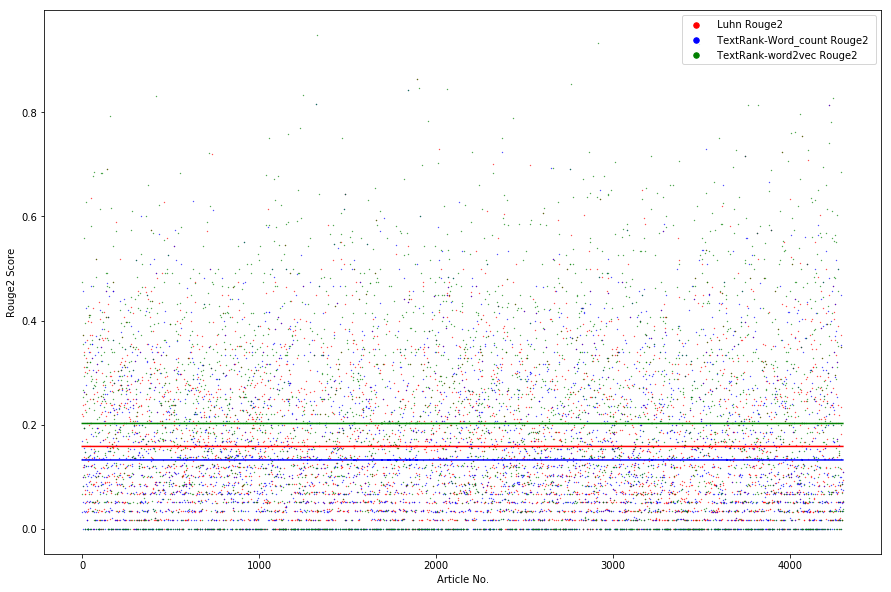

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
mean_Luhn = [np.mean(Luhn_rouge1)]*len(xtags)
mean_TextRank_wc = [np.mean(TextRank_wc_rouge1)]*len(xtags)
mean_TextRank_w2v = [np.mean(TextRank_w2v_rouge1)]*len(xtags)
plt.scatter(xtags,Luhn_rouge1,s=0.1,color = "r")
plt.scatter(xtags,TextRank_wc_rouge1,s=0.1, color = "b")
plt.scatter(xtags,TextRank_w2v_rouge1,s=0.1, color = "g")
plt.plot(xtags,mean_Luhn,color = "r")
plt.plot(xtags,mean_TextRank_wc,color = "b")
plt.plot(xtags,mean_TextRank_w2v,color = "g")

lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.xlabel('Article No.')
plt.ylabel('Rouge2 Score')


Luhn's method with TF-IDF and stemming 0.15839609067
TextRank with WordCont 0.132442779538
TextRank with Word2Vec 0.202497208375


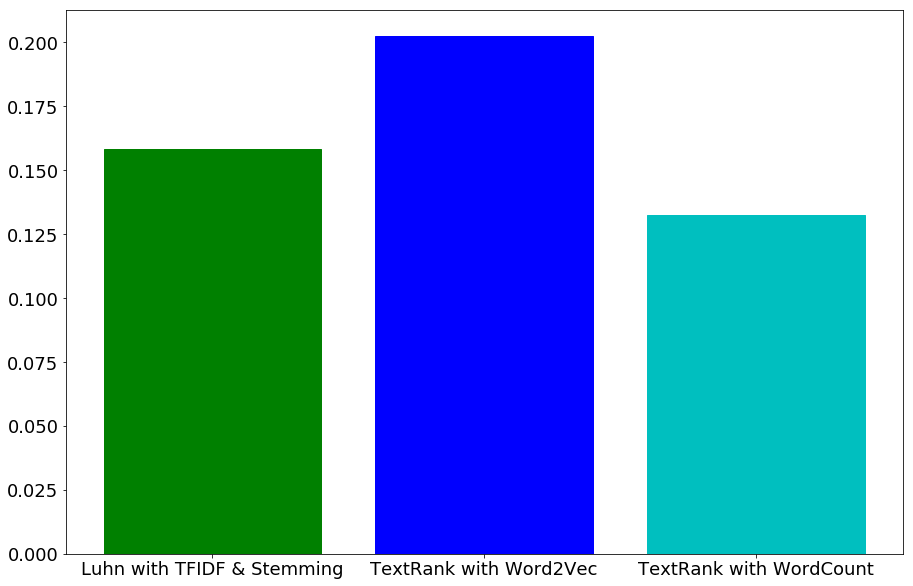

In [19]:
print "Luhn's method with TF-IDF and stemming",np.mean(Luhn_rouge1)
print "TextRank with WordCont",np.mean(TextRank_wc_rouge1)
print "TextRank with Word2Vec",np.mean(TextRank_w2v_rouge1)

x1 = np.mean(TextRank_wc_rouge1)
x2 = np.mean(Luhn_rouge1)
x3 = np.mean(TextRank_w2v_rouge1)

plt.rcParams.update({'font.size': 18})
barlist = plt.bar((['TextRank with WordCount','Luhn with TFIDF & Stemming','TextRank with Word2Vec']),([x1,x2,x3]))
barlist[0].set_color('c')
barlist[1].set_color('g')
barlist[2].set_color('b')


Text(0,0.5,u'Rouge-2 Score')

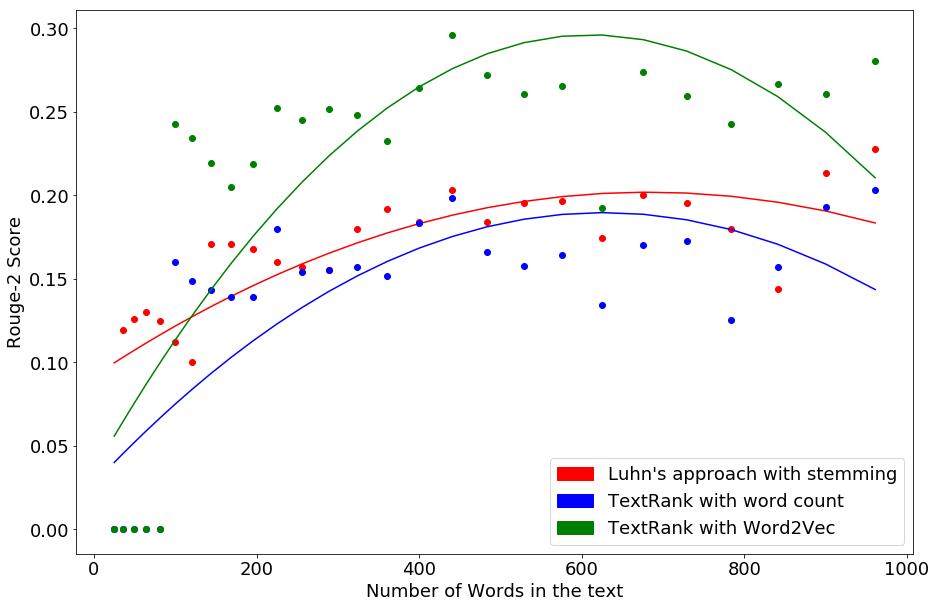

In [21]:
def group_by(data):
    d = {}
    di = {}
    for each in data:
        if each[0] not in d:
            d[each[0]] = 0
            di[each[0]] = 0
        d[each[0]] += each[1]
        di[each[0]] += 1
    for each in d:
        d[each] = d[each]/float(di[each])
    return d



sorted_words = np.array(d[headers[1]])
sorted_words = sorted_words.transpose()
sorted_words = np.append([sorted_words],[d[headers[4]]],axis = 0)
sorted_words = sorted_words.transpose()
sorted_words = sorted_words[sorted_words[:,0].argsort()]
sorted_words = sorted_words[~np.isnan(sorted_words).any(axis=1)]
sorted_words = sorted_words[~np.isnan(sorted_words).any(axis=1)]
sorted_words = sorted_words[sorted_words[:,0]<=1000,:]

temp = group_by(sorted_words)
import collections
temp = collections.OrderedDict(sorted(temp.items()))

data = []
for each in temp:
    data.append([each,temp[each]])
data = np.array(data)
fig,ax = plt.subplots()
ax.plot(data[:,0],data[:,1],'ro')

from numpy.polynomial import polynomial as P
c = np.polyfit(data[:,0],data[:,1],2)
predict = c[2]*data[:,0]**0 + c[1] * data[:,0]**1 + c[0] * data[:,0]**2
plt.plot(data[:,0],predict,'r-')


sorted_words = np.array(d[headers[1]])
sorted_words = sorted_words.transpose()
sorted_words = np.append([sorted_words],[d[headers[6]]],axis = 0)
sorted_words = sorted_words.transpose()
sorted_words = sorted_words[sorted_words[:,0].argsort()]
sorted_words = sorted_words[~np.isnan(sorted_words).any(axis=1)]
sorted_words = sorted_words[~np.isnan(sorted_words).any(axis=1)]
sorted_words = sorted_words[sorted_words[:,0]<=1000,:]

temp = group_by(sorted_words)
temp = collections.OrderedDict(sorted(temp.items()))

data = []
for each in temp:
    data.append([each,temp[each]])
data = np.array(data)
ax.plot(data[:,0],data[:,1],'bo')

from numpy.polynomial import polynomial as P
c = np.polyfit(data[:,0],data[:,1],2)
predict = c[2]*data[:,0]**0 + c[1] * data[:,0]**1 + c[0] * data[:,0]**2
plt.plot(data[:,0],predict,'b-')


sorted_words = np.array(d[headers[1]])
sorted_words = sorted_words.transpose()
sorted_words = np.append([sorted_words],[d[headers[8]]],axis = 0)
sorted_words = sorted_words.transpose()
sorted_words = sorted_words[sorted_words[:,0].argsort()]
sorted_words = sorted_words[~np.isnan(sorted_words).any(axis=1)]
sorted_words = sorted_words[~np.isnan(sorted_words).any(axis=1)]
sorted_words = sorted_words[sorted_words[:,0]<=1000,:]

temp = group_by(sorted_words)
temp = collections.OrderedDict(sorted(temp.items()))

data = []
for each in temp:
    data.append([each,temp[each]])
data = np.array(data)
ax.plot(data[:,0],data[:,1],'go')

from numpy.polynomial import polynomial as P
c = np.polyfit(data[:,0],data[:,1],2)
predict = c[2]*data[:,0]**0 + c[1] * data[:,0]**1 + c[0] * data[:,0]**2
plt.plot(data[:,0],predict,'g-')


import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Luhn\'s approach with stemming')
blue_patch = mpatches.Patch(color='blue', label='TextRank with word count')
green_patch = mpatches.Patch(color='green', label='TextRank with Word2Vec')

ax.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Number of Words in the text')
plt.ylabel('Rouge-2 Score')